# Step5: Downstream Analysis

## Look at main Outputs

In [1]:
import os
import sys
import subprocess
import pycisTopic
pycisTopic.__version__
import subprocess
from pycisTopic.cistopic_class import *
from pycisTopic.utils import *
from pycisTopic.lda_models import * 
import anndata as ad
import scanpy as sc

2025-03-07 09:38:33,481	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
# Determine the folder in which the code is executed
WORKING_DIR = os.getcwd()
sys.path.append(os.path.abspath( WORKING_DIR))

# Run the params codes
%run -i ../../globalParams.py #GlobalParams
%run -i ../../sampleParams.py #sampleParams
%run -i ./analysisParams.py #AnalysisParams
import analysisUtils  #AnalysisUtils (hand written functions)

In [3]:
#Import the mudata object
import mudata
scplus_mdata = mudata.read(os.path.join(PATH_TO_THE_04d_OUPUT_FOLDER , "outs/scplusmdata.h5mu"))

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  w

### Quick visualization of object structures

In [6]:
#Direct e_regulon
scplus_mdata.uns["direct_e_regulon_metadata"]

Region      Gene  importance_R2G   rho_R2G  \
0     chr3:111071423-111071923   NECTIN3        0.164009  0.128507   
1       chr8:94262085-94262585       GEM        0.052765  0.243147   
2     chr3:105366451-105366951     ALCAM        0.145009  0.182042   
3        chr10:8060105-8060605     GATA3        0.065697  0.119896   
4     chr4:112232017-112232517   FAM241A        0.019840  0.068467   
...                        ...       ...             ...       ...   
8648    chr9:81814915-81815415      TLE1        0.017577 -0.123924   
8649   chr11:64865503-64866003   RASGRP2        0.031308 -0.105480   
8650   chr22:49967294-49967794      MLC1        0.006459 -0.086784   
8651      chr1:2578208-2578708  TNFRSF14        0.020571 -0.069632   
8652    chr5:40808034-40808534    PTGER4        0.017215 -0.142886   

      importance_x_rho  importance_x_abs_rho    TF  is_extended  \
0             0.021076              0.021076   AHR        False   
1             0.012830              0.012830   AHR        False   
2             0.026398              0.026398   AHR        False   
3             0.007877              0.007877   AHR        False   
4             0.001358              0.001358   AHR        False   
...                ...                   ...   ...          ...   
8648         -0.002178              0.002178  ZEB1        False   
8649         -0.003302              0.003302  ZEB1        False   
8650         -0.000560              0.000560  ZEB1        False   
8651         -0.001432              0.001432  ZEB1        False   
8652         -0.002460              0.002460  ZEB1        False   

        eRegulon_name    Gene_signature_name   Region_signature_name  \
0      AHR_direct_+/+   AHR_direct_+/+_(28g)    AHR_direct_+/+_(33r)   
1      AHR_direct_+/+   AHR_direct_+/+_(28g)    AHR_direct_+/+_(33r)   
2      AHR_direct_+/+   AHR_direct_+/+_(28g)    AHR_direct_+/+_(33r)   
3      AHR_direct_+/+   AHR_direct_+/+_(28g)    AHR_direct_+/+_(33r)   
4      AHR_direct_+/+   AHR_direct_+/+_(28g)    AHR_direct_+/+_(33r)   
...               ...                    ...                     ...   
8648  ZEB1_direct_-/-  ZEB1_direct_-/-_(87g)  ZEB1_direct_-/-_(124r)   
8649  ZEB1_direct_-/-  ZEB1_direct_-/-_(87g)  ZEB1_direct_-/-_(124r)   
8650  ZEB1_direct_-/-  ZEB1_direct_-/-_(87g)  ZEB1_direct_-/-_(124r)   
8651  ZEB1_direct_-/-  ZEB1_direct_-/-_(87g)  ZEB1_direct_-/-_(124r)   
8652  ZEB1_direct_-/-  ZEB1_direct_-/-_(87g)  ZEB1_direct_-/-_(124r)   

      importance_TF2G  regulation  rho_TF2G  triplet_rank  
0            2.353124           1  0.065638          1780  
1            1.891925           1  0.099529          3820  
2            2.352833           1  0.081748          1276  
3            3.343828           1  0.084863          1184  
4            1.849674           1  0.107352          7838  
...               ...         ...       ...           ...  
8648         2.558964          -1 -0.111692          5683  
8649         2.606168          -1 -0.087937          3427  
8650         3.346741          -1 -0.107108          6977  
8651         3.174714          -1 -0.063135          4539  
8652         2.755090          -1 -0.104372          6616  

[8653 rows x 15 columns]

In [7]:
#Extended e_regulon
scplus_mdata.uns["extended_e_regulon_metadata"]

Region     Gene  importance_R2G   rho_R2G  \
0       chr13:31204593-31205093    HSPH1        0.082611  0.399690   
1        chr6:53250141-53250641   ELOVL5        0.116156  0.215970   
2      chr7:157350405-157350905   DNAJB6        0.096447  0.288020   
3         chr20:4666012-4666512     PRNP        0.153227  0.129323   
4      chr2:112692940-112693440  SLC20A1        0.088932  0.053966   
...                         ...      ...             ...       ...   
5845  chr10:113103124-113103624   TCF7L2        0.025978 -0.120051   
5846    chr16:57601944-57602444   ADGRG1        0.047858 -0.199468   
5847    chr14:69620133-69620633    SRSF5        0.043573 -0.099262   
5848    chr22:35604755-35605255    APOL6        0.035810 -0.130765   
5849    chr10:70477650-70478150     PRF1        0.031401 -0.359572   

      importance_x_rho  importance_x_abs_rho     TF  is_extended  \
0             0.033019              0.033019   ATF3         True   
1             0.025086              0.025086   ATF3         True   
2             0.027779              0.027779   ATF3         True   
3             0.019816              0.019816   ATF3         True   
4             0.004799              0.004799   ATF3         True   
...                ...                   ...    ...          ...   
5845         -0.003119              0.003119  RUNX2         True   
5846         -0.009546              0.009546  RUNX2         True   
5847         -0.004325              0.004325  RUNX2         True   
5848         -0.004683              0.004683  RUNX2         True   
5849         -0.011291              0.011291  RUNX2         True   

           eRegulon_name       Gene_signature_name     Region_signature_name  \
0      ATF3_extended_+/+   ATF3_extended_+/+_(16g)   ATF3_extended_+/+_(18r)   
1      ATF3_extended_+/+   ATF3_extended_+/+_(16g)   ATF3_extended_+/+_(18r)   
2      ATF3_extended_+/+   ATF3_extended_+/+_(16g)   ATF3_extended_+/+_(18r)   
3      ATF3_extended_+/+   ATF3_extended_+/+_(16g)   ATF3_extended_+/+_(18r)   
4      ATF3_extended_+/+   ATF3_extended_+/+_(16g)   ATF3_extended_+/+_(18r)   
...                  ...                       ...                       ...   
5845  RUNX2_extended_-/-  RUNX2_extended_-/-_(10g)  RUNX2_extended_-/-_(10r)   
5846  RUNX2_extended_-/-  RUNX2_extended_-/-_(10g)  RUNX2_extended_-/-_(10r)   
5847  RUNX2_extended_-/-  RUNX2_extended_-/-_(10g)  RUNX2_extended_-/-_(10r)   
5848  RUNX2_extended_-/-  RUNX2_extended_-/-_(10g)  RUNX2_extended_-/-_(10r)   
5849  RUNX2_extended_-/-  RUNX2_extended_-/-_(10g)  RUNX2_extended_-/-_(10r)   

      importance_TF2G  regulation  rho_TF2G  triplet_rank  
0            5.593094           1  0.246845           803  
1            1.654683           1  0.125915          2499  
2            2.600732           1  0.117257          2719  
3            1.753848           1  0.064839           937  
4            1.522216           1  0.068053          2847  
...               ...         ...       ...           ...  
5845         0.652844          -1 -0.064240          5388  
5846         0.864963          -1 -0.100052          2667  
5847         0.646995          -1 -0.052759          5399  
5848         1.117930          -1 -0.077743          5129  
5849         1.312745          -1 -0.148116          4451  

[5850 rows x 15 columns]

## Downstream Analysis

### eRegulon dimensionality reduction

In [8]:
#Use the eRegulon enrichment scores to perform dimensionality reductions
eRegulon_gene_AUC = ad.concat(
    [scplus_mdata["direct_gene_based_AUC"], scplus_mdata["extended_gene_based_AUC"], scplus_mdata["direct_region_based_AUC"], scplus_mdata["extended_region_based_AUC"]],
    axis = 1,
)


In [10]:
#Perform the dimensional reduction on AUC
eRegulon_gene_AUC.obs = scplus_mdata.obs.loc[eRegulon_gene_AUC.obs_names]
sc.pp.neighbors(eRegulon_gene_AUC, use_rep = "X")
sc.tl.umap(eRegulon_gene_AUC)

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


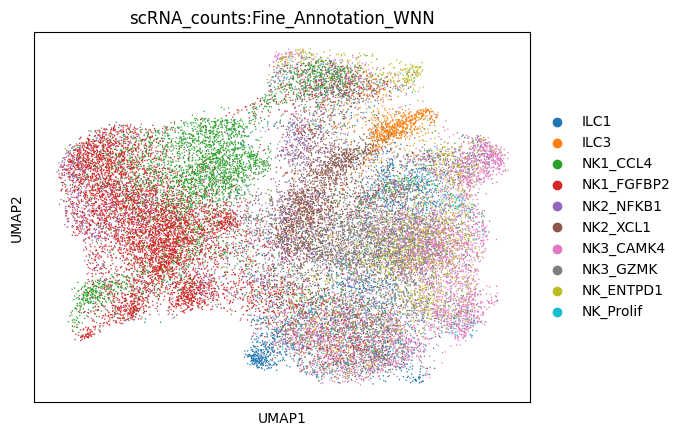

In [13]:
#Visualisation of the UMAP in the AUC space colored by main celltypes
sc.pl.umap(eRegulon_gene_AUC, color =  "scRNA_counts:"+ CELL_TYPE_COLNAME)

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


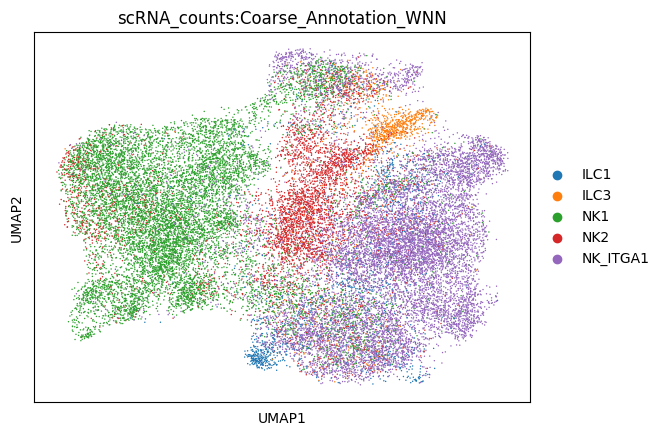

In [14]:
#Visualisation of the UMAP in the AUC space colored by precise celltypes
sc.pl.umap(eRegulon_gene_AUC, color =  "scRNA_counts:"+ CELL_TYPE_COLNAME2)

## eRegulon specificity score

### eRegulon specificity score calcul and First observation

In [15]:
from scenicplus.RSS import (regulon_specificity_scores, plot_rss)

In [16]:
rss = regulon_specificity_scores(
    scplus_mudata = scplus_mdata,
    variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    modalities = ["direct_gene_based_AUC", "extended_gene_based_AUC"]
)

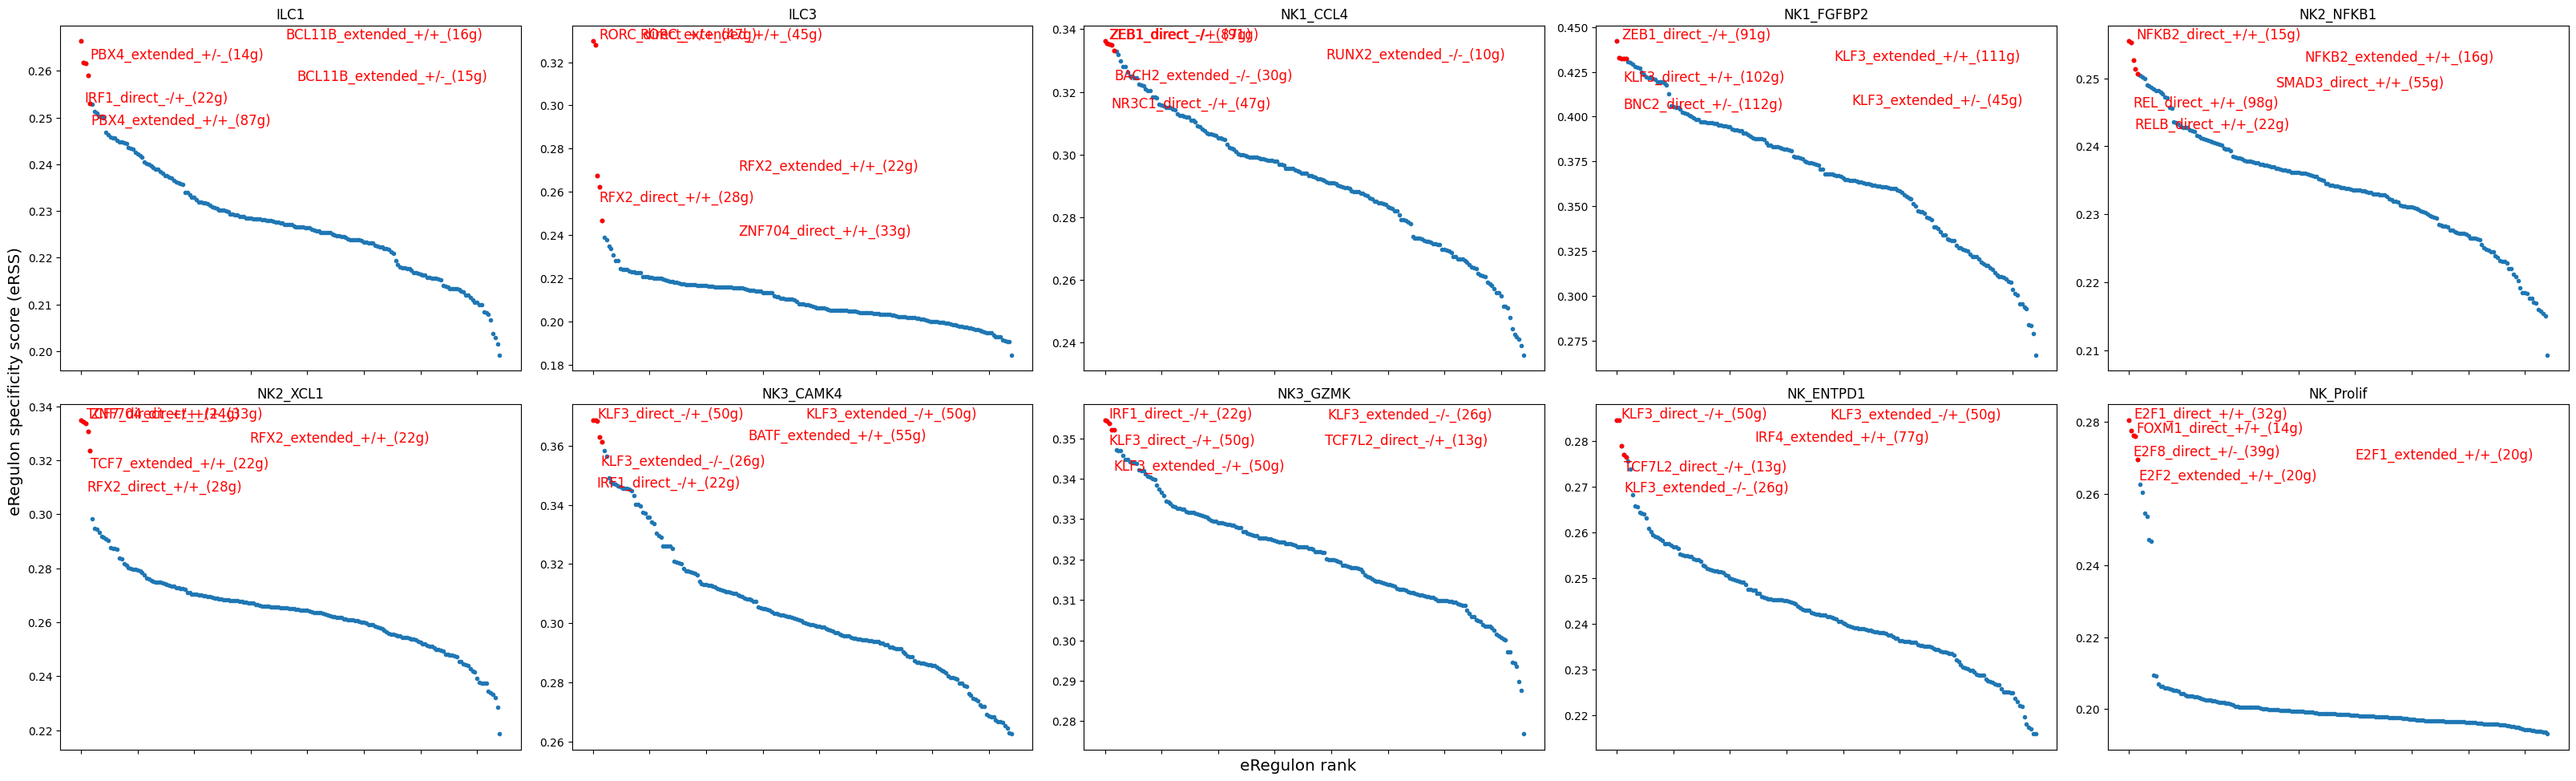

In [17]:
plot_rss(
    data_matrix = rss,
    top_n = 5,
    num_columns = 5
)

### eRegulon specificity score UMAP visualization

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


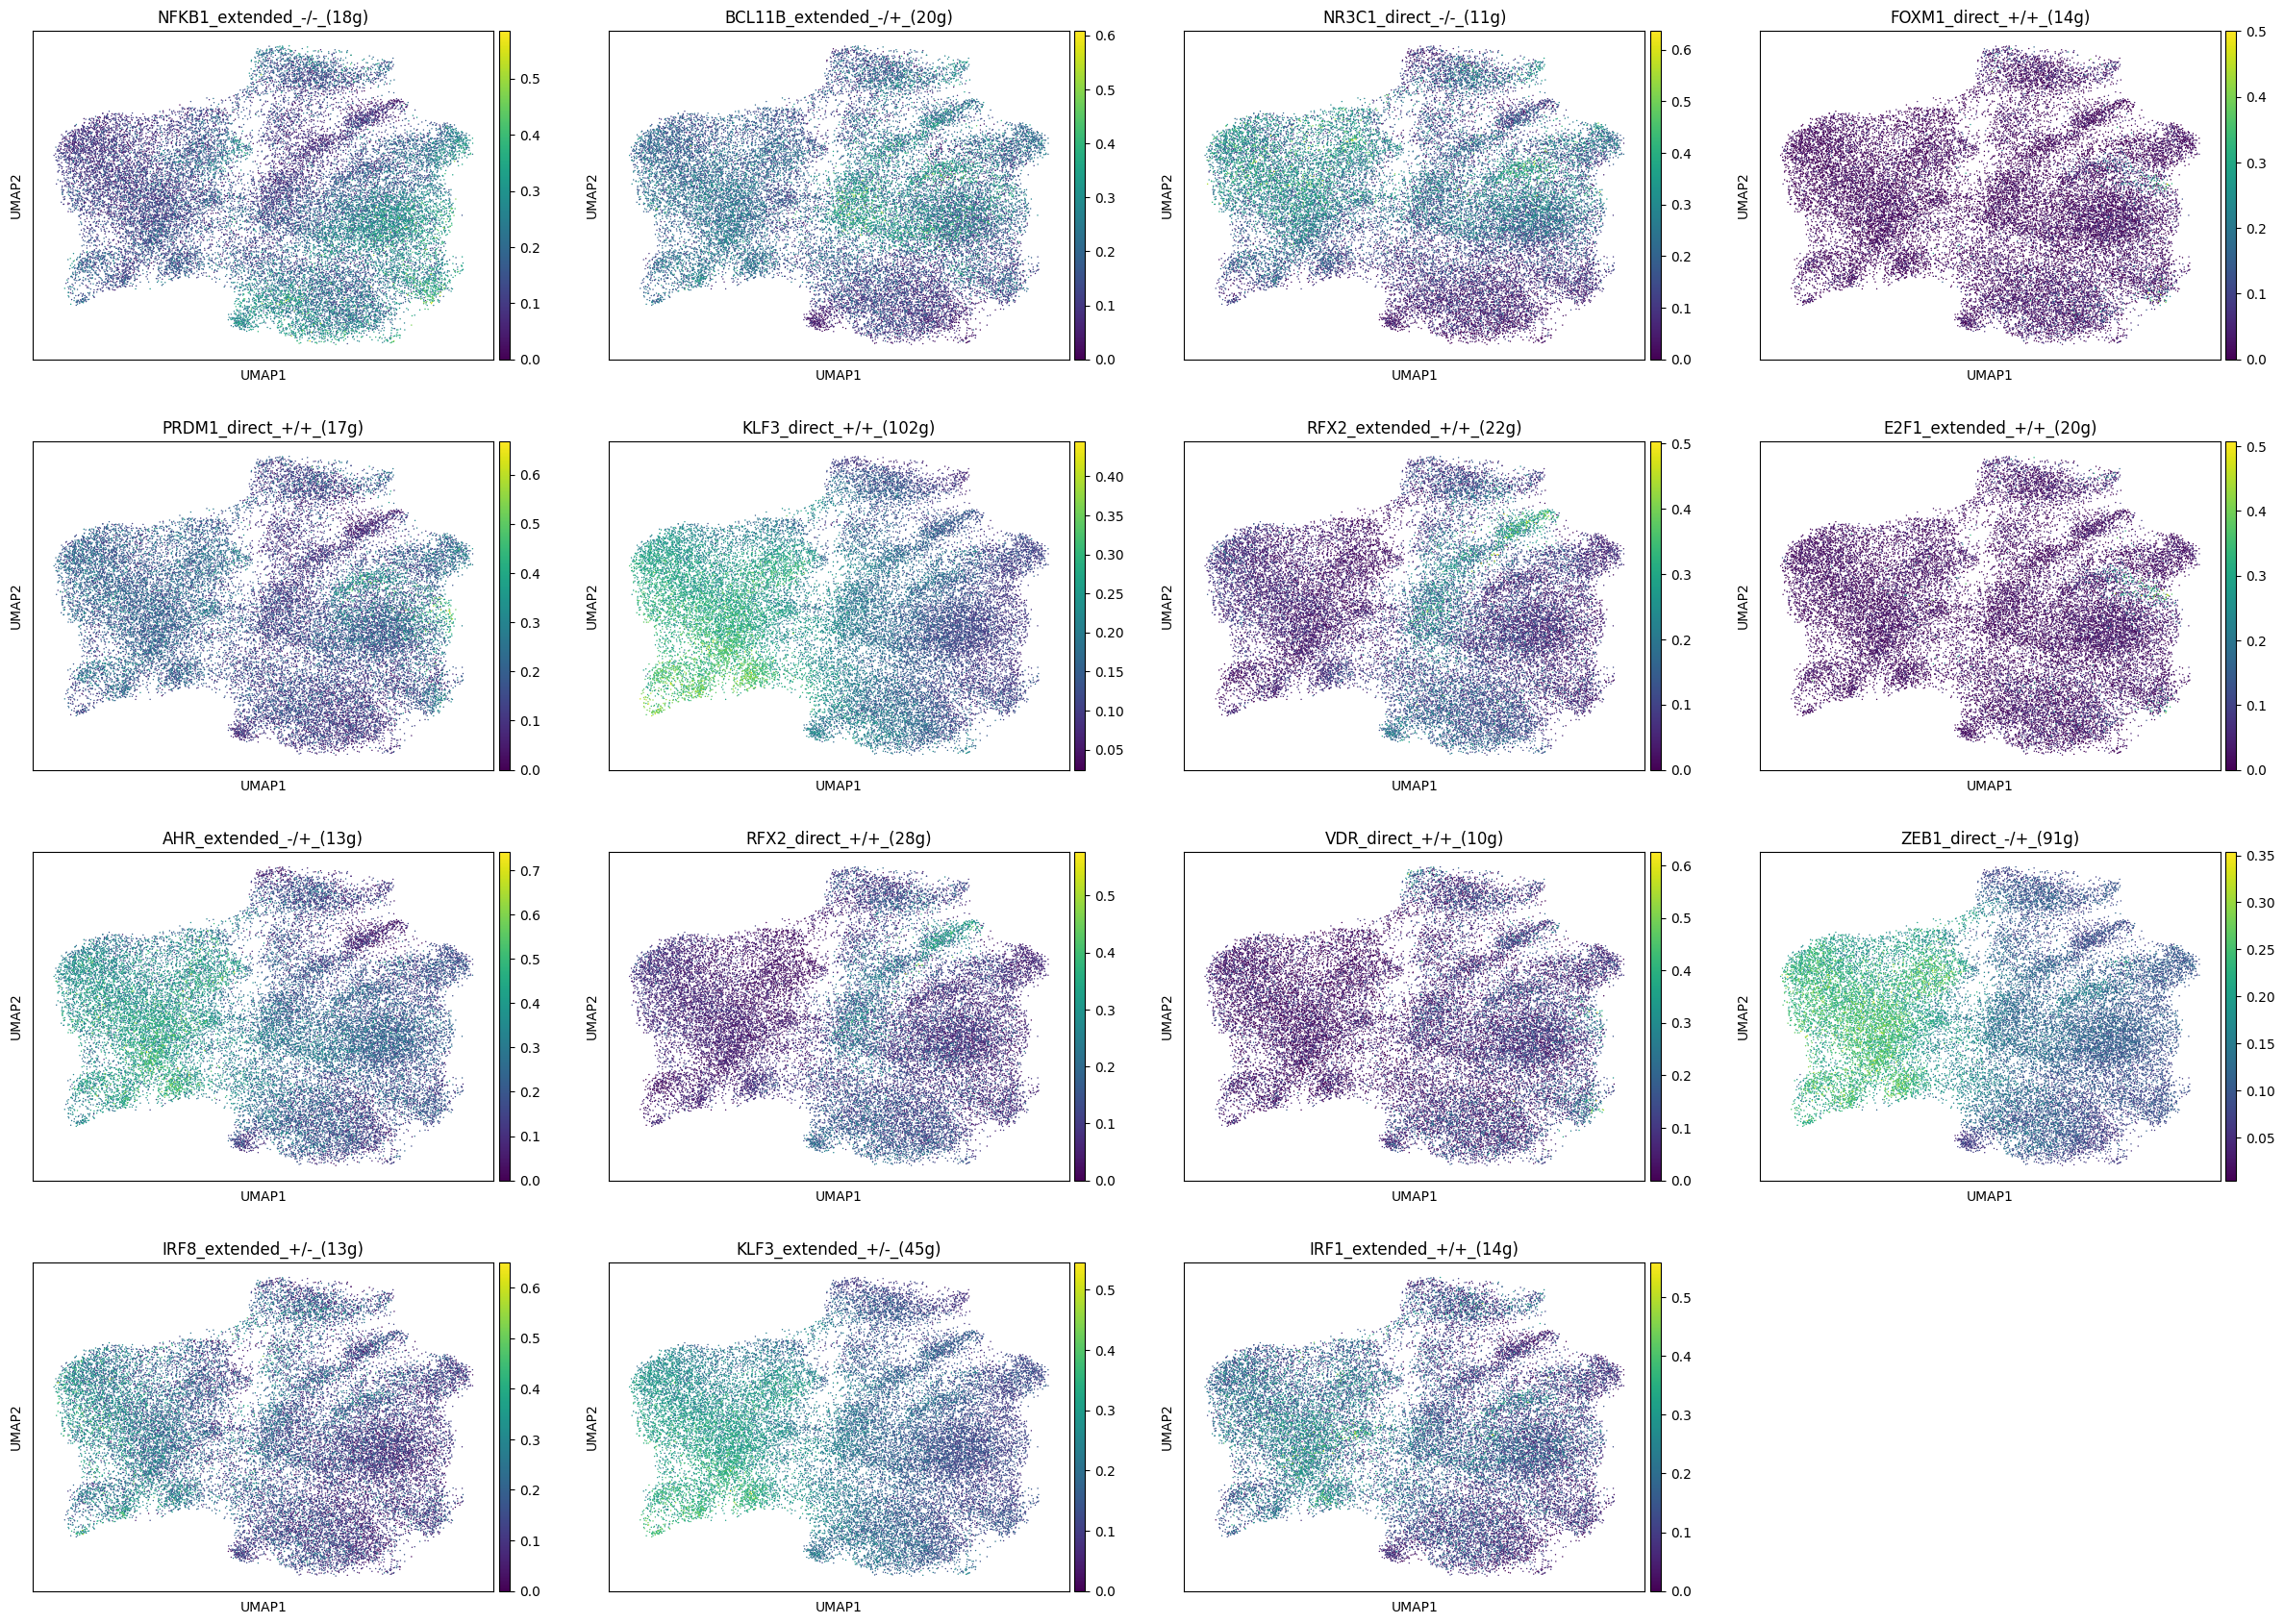

In [18]:
sc.pl.umap(eRegulon_gene_AUC, color = list(set([x for xs in [rss.loc[ct].sort_values()[0:2].index for ct in rss.index] for x in xs ])))

## Heatmap dotplot of the most specific eRegulons

In [19]:
#Import
from scenicplus.plotting.dotplot import heatmap_dotplot

##### Explore from here

In [30]:
# Extract unique eRegulon names as a list
eRegulon_names_list = list(set(scplus_mdata.uns['direct_e_regulon_metadata']['eRegulon_name']))


# Extract unique extended eRegulon names as a list
eRegulon_names_list_extended = list(set(scplus_mdata.uns['extended_e_regulon_metadata']['eRegulon_name']))

# Apply conditional filtering
if DO_FILTER_REGULON:
    filtered_eRegulon_names = [name for name in eRegulon_names_list if name.endswith("+/+") or name.endswith("+/-")]
else:
    filtered_eRegulon_names = eRegulon_names_list


In [31]:
# Extract unique eRegulon names as a list
eRegulon_names_list = list(set(scplus_mdata.uns['direct_e_regulon_metadata']['eRegulon_name']))

if DO_FILTER_REGULON:
    # Split the names by their common identifier (excluding the suffix) and collect pairs
    regulon_dict = {}
    for name in eRegulon_names_list:
        base_name = name.rsplit('_', 1)[0]  # Extract the base part of the name before the suffix
        regulon_dict.setdefault(base_name, []).append(name)

    # Keep only the most specific forms: +/+ for activator and -/+ for repressor
    filtered_eRegulon_names = []
    for base_name, variants in regulon_dict.items():
        activator_variants = [v for v in variants if v.endswith("+/+") or v.endswith("+/-")]
        repressor_variants = [v for v in variants if v.endswith("-/+") or v.endswith("-/-")]

        # Handle activators: keep only +/+ if both forms exist
        if any(v.endswith("+/+") for v in activator_variants):
            filtered_eRegulon_names.append(next(v for v in activator_variants if v.endswith("+/+")))
        else:
            filtered_eRegulon_names.extend(activator_variants)

        # Handle repressors: keep only -/+ if both forms exist
        if any(v.endswith("-/+") for v in repressor_variants):
            filtered_eRegulon_names.append(next(v for v in repressor_variants if v.endswith("-/+")))
        else:
            filtered_eRegulon_names.extend(repressor_variants)
else:
    filtered_eRegulon_names = eRegulon_names_list

# Print the filtered list
print("Filtered eRegulon names:", filtered_eRegulon_names)



Filtered eRegulon names: ['IRF1_direct_+/+', 'IRF1_direct_-/+', 'E2F2_direct_+/+', 'KLF13_direct_+/+', 'RUNX2_direct_+/+', 'TCF7_direct_+/+', 'STAT1_direct_+/+', 'AHR_direct_+/+', 'AHR_direct_-/+', 'FOSL2_direct_+/+', 'TFDP2_direct_+/-', 'CTNNB1_direct_+/+', 'RFX2_direct_+/+', 'BNC2_direct_+/+', 'BNC2_direct_-/+', 'VDR_direct_+/+', 'KLF3_direct_+/+', 'KLF3_direct_-/+', 'ZNF704_direct_+/+', 'IRF8_direct_+/+', 'JUNB_direct_+/-', 'RELB_direct_+/+', 'KLF6_direct_+/+', 'KLF6_direct_-/+', 'E2F1_direct_+/+', 'STAT2_direct_+/+', 'RORA_direct_+/+', 'NFAT5_direct_+/+', 'RUNX1_direct_+/+', 'RUNX1_direct_-/+', 'NFE2L2_direct_+/-', 'FOXO1_direct_+/-', 'JUND_direct_+/-', 'JUND_direct_-/-', 'BACH2_direct_+/+', 'BACH2_direct_-/-', 'DRAP1_direct_+/+', 'FOXO3_direct_-/+', 'NFKB2_direct_+/+', 'NFATC2_direct_+/+', 'NFATC2_direct_-/+', 'FLI1_direct_-/-', 'KLF12_direct_-/-', 'TCF7L2_direct_-/+', 'CREM_direct_+/+', 'NFKB1_direct_+/+', 'NFKB1_direct_-/-', 'ELF1_direct_+/+', 'MAF_direct_+/+', 'REL_direct_+/+',

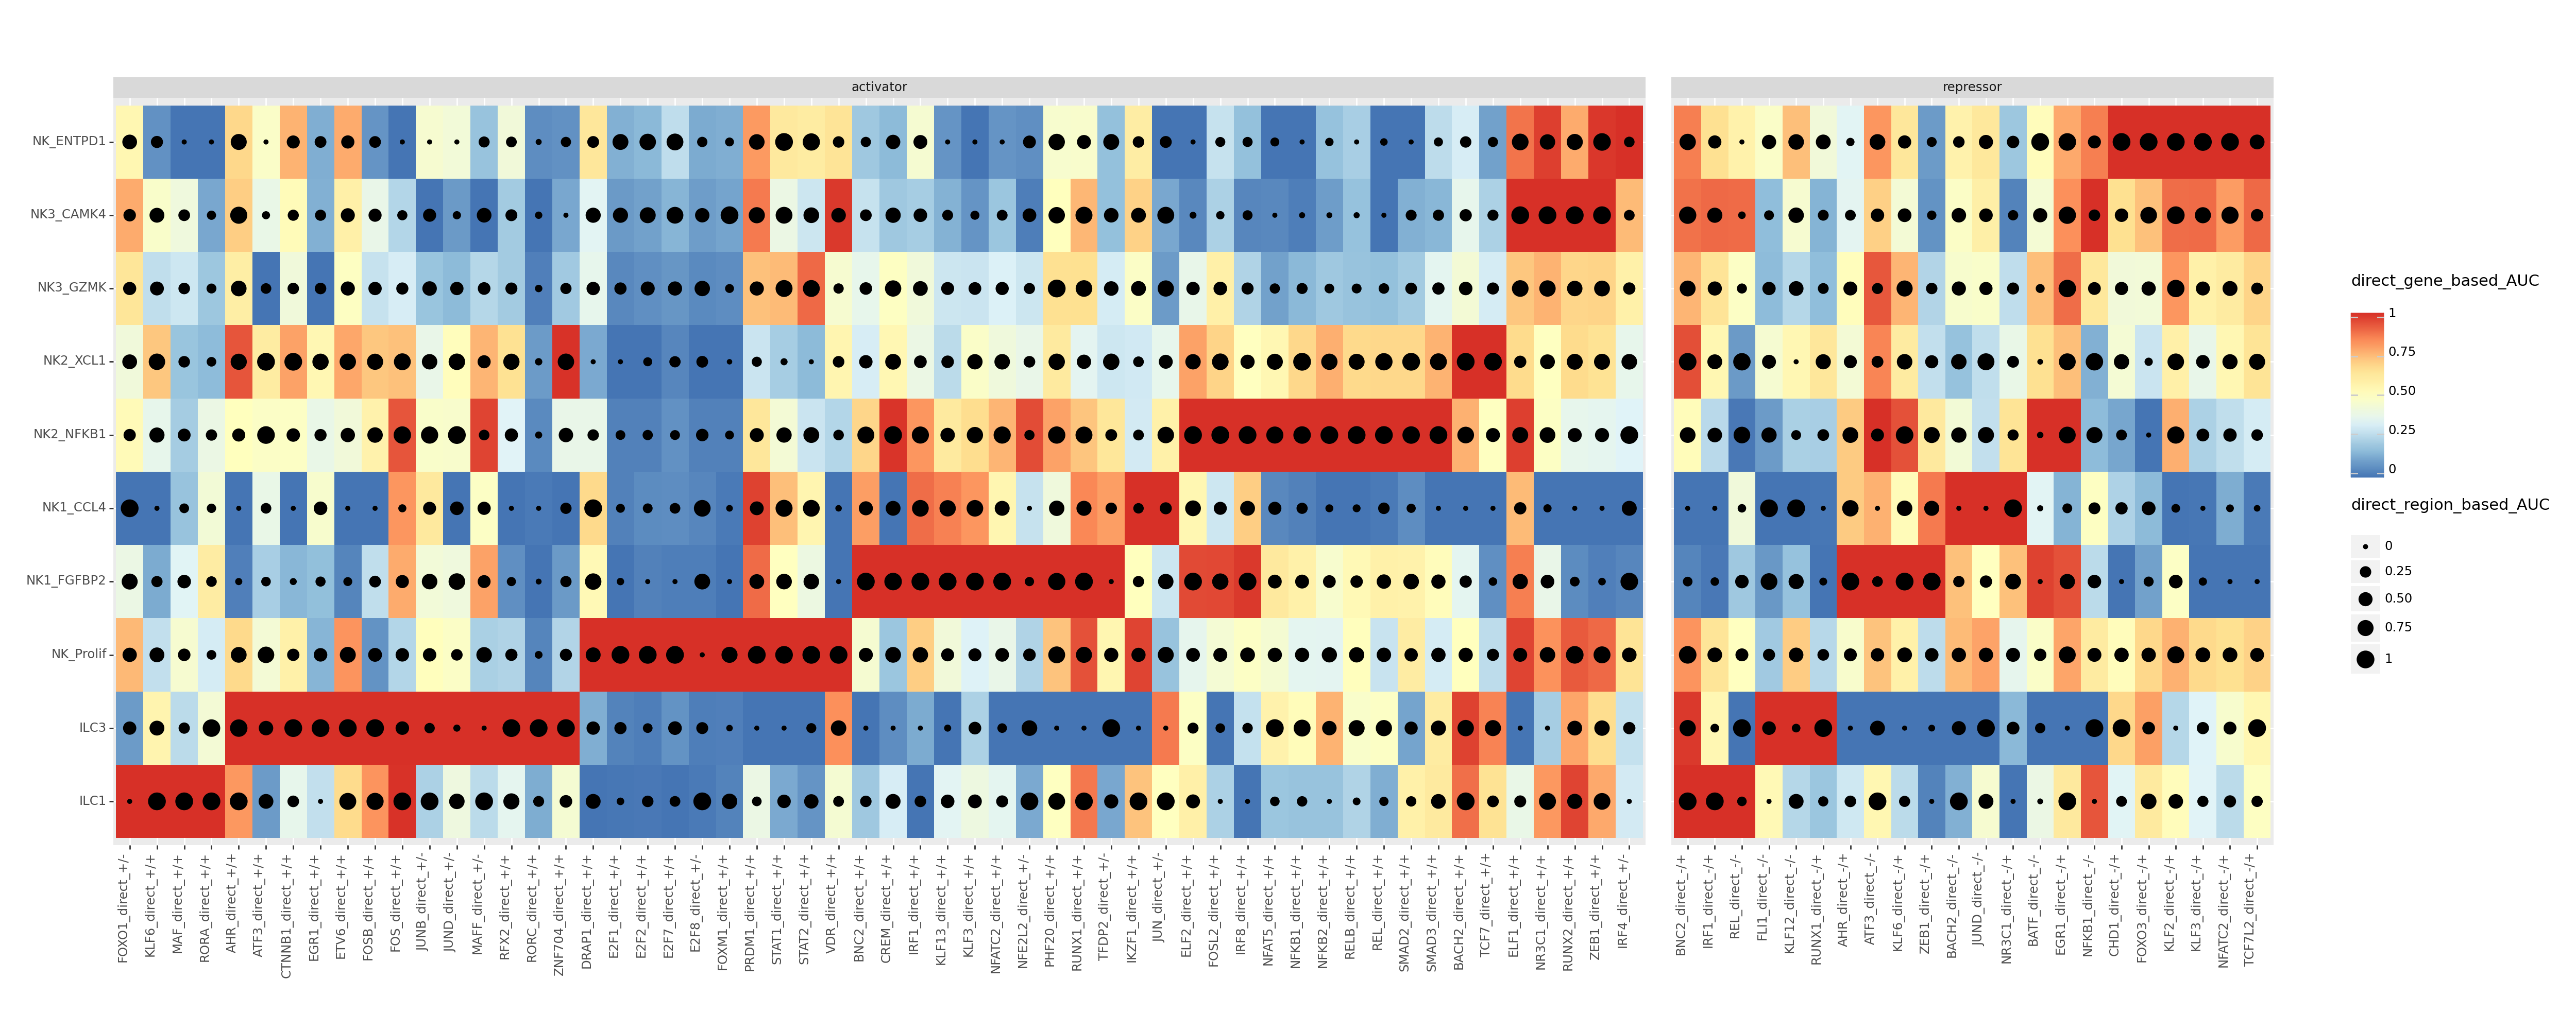

<Figure Size: (2500 x 1000)>

In [32]:
#Saving the heatmaps Gene selection
import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name", #eRegulon_name
    sort_data_by = "direct_gene_based_AUC",
    orientation = "horizontal",
    split_repressor_activator = True,
    figsize = (25, 10),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names
    #save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Gene_Best_horizontal.pdf")
)


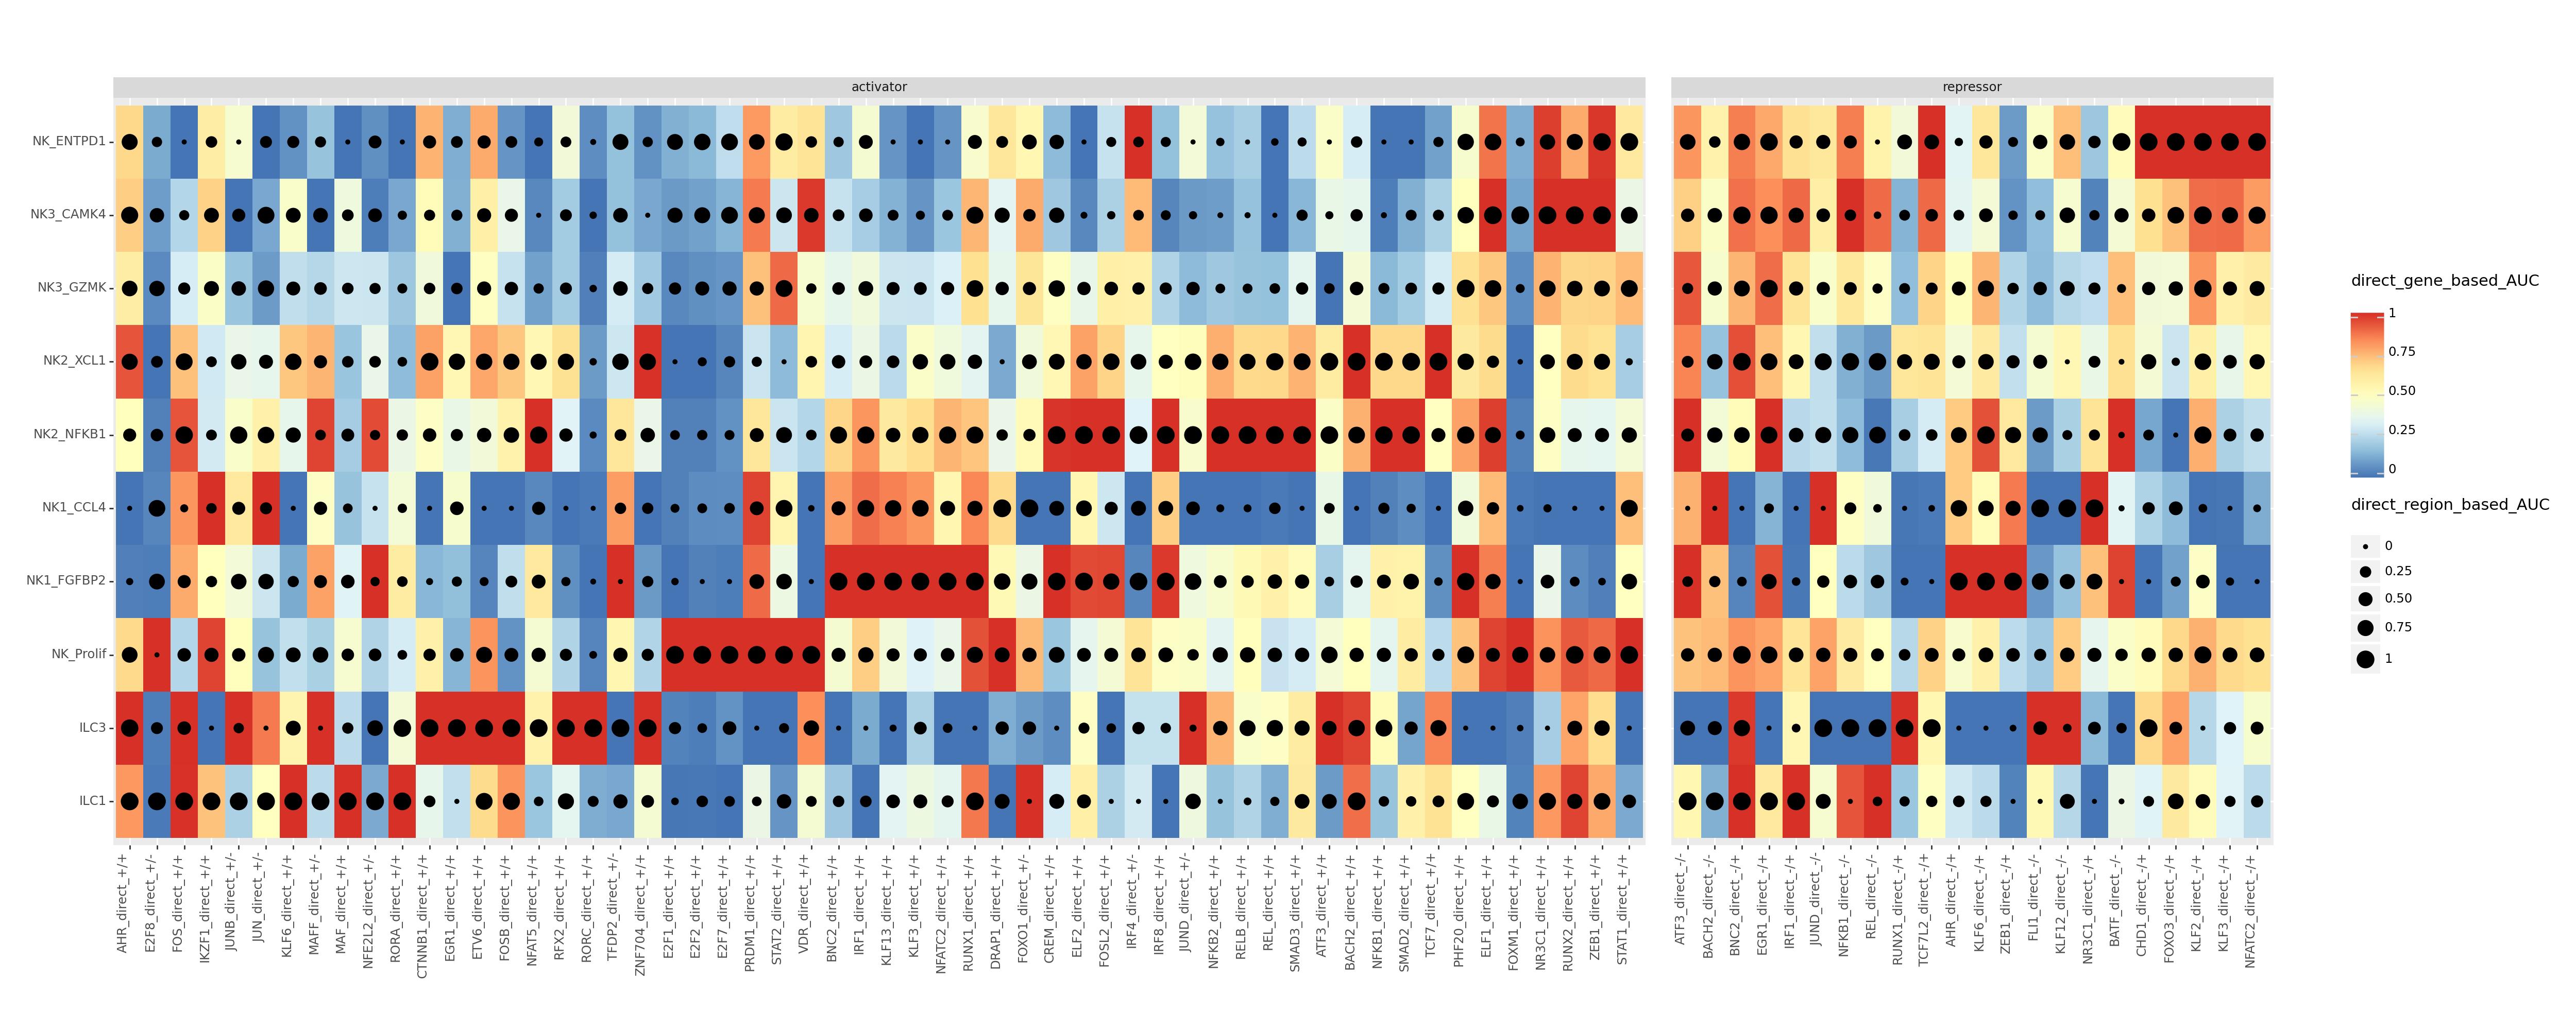

<Figure Size: (2500 x 1000)>

In [33]:
#Looking at the heatmaps Region selection

import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_region_based_AUC",
    orientation = "horizontal",
    figsize = (25, 10),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names
    #save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Region_Best_horizontal.pdf")
)

# Saving HD Figures

In [51]:
# Saving the heatmaps vertical, horizontal, Gene and Region based
import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_gene_based_AUC",
    orientation = "horizontal",
    figsize = (21, 5),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names,
    save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Gene_Best_horizontal.pdf")
)

import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_gene_based_AUC",
    orientation = "vertical",
    figsize = (7, 21),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names,
    save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Gene_Best_vertical.pdf")
)

import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_region_based_AUC",
    orientation = "horizontal",
    figsize = (21, 5),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names,
    save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Region_Best_horizontal.pdf")
)

import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_region_based_AUC",
    orientation = "vertical",
    figsize = (7, 21),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names,
    save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Region_Best_vertical.pdf")
)

/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 21 x 5 in image.
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/08_SCENICplus_Analysis_NK3/04e_Step5_Downstream_Analysis/heatmap_dotplots/Heat_Map__DotPlot_Gene_Best_horizontal.pdf
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 7 x 21 in image.
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/08_SCENICplus_Analysis_NK3/04e_Step5_Downstream_Analysis/heatmap_dotplots/Heat_Map__DotPlot_Gene_Best_vertical.pdf
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 21 x 5 in image.
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /mnt/DOSI/EVLAB/BIOINFO/BIOI

In [52]:
# Saving the heatmaps vertical, horizontal, Gene and Region based
import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_gene_based_AUC",
    orientation = "horizontal",
    figsize = (21, 5),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names,
    save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Gene_Best_horizontal.svg")
)

import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_gene_based_AUC",
    orientation = "vertical",
    figsize = (7, 21),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names,
    save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Gene_Best_vertical.svg")
)

import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_region_based_AUC",
    orientation = "horizontal",
    figsize = (21, 5),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names,
    save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Region_Best_horizontal.svg")
)

import matplotlib.pyplot as plt
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "scRNA_counts:"+ CELL_TYPE_COLNAME,
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_region_based_AUC",
    orientation = "vertical",
    figsize = (7, 21),
    group_variable_order = GROUP_VARIABLE_ORDER,
    subset_feature_names = filtered_eRegulon_names,
    save = os.path.join( PATH_ANALYSIS_OUTPUT, "heatmap_dotplots/Heat_Map__DotPlot_Region_Best_vertical.svg")
)

/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 21 x 5 in image.
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/08_SCENICplus_Analysis_NK3/04e_Step5_Downstream_Analysis/heatmap_dotplots/Heat_Map__DotPlot_Gene_Best_horizontal.svg
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 7 x 21 in image.
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /mnt/DOSI/EVLAB/BIOINFO/BIOINFO_PROJECT/Lung_Basel/01_ALL_SAMPLES/05_Output/08_SCENICplus_Analysis_NK3/04e_Step5_Downstream_Analysis/heatmap_dotplots/Heat_Map__DotPlot_Gene_Best_vertical.svg
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 21 x 5 in image.
/opt/conda/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /mnt/DOSI/EVLAB/BIOINFO/BIOI

## Converting mudata output to old-style SCENIC+ object

In [36]:
from scenicplus.scenicplus_class import mudata_to_scenicplus

scplus_obj = mudata_to_scenicplus(
    mdata = scplus_mdata,
    path_to_cistarget_h5 = os.path.join(PATH_TO_THE_04d_OUPUT_FOLDER , "outs/ctx_results.hdf5"),
    path_to_dem_h5 = os.path.join(PATH_TO_THE_04d_OUPUT_FOLDER , "outs/dem_results.hdf5")
)



SCENIC+ object with n_cells x n_genes = 28422 x 36601 and n_cells x n_regions = 28422 x 271181
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
	metadata_cell:'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'cell_type', 'sex', 'smoker', 'sample', 'nCount_peaks', 'nFeature_peaks', 'fragments', 'FRiP', 'blacklist_fraction', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nucleosome_group', 'high.tss', 'percent.rb', 'percent.mt', 'percent.HSP', 'S.Score', 'G2M.Score', 'Phase', 'pct_chrY', 'nCount_SCT', 'nFeature_SCT', 'integrated.weight', 'peaks.weight', 'seurat_clusters', 'NK_sig_UCell', 'NK1_sig_UCell', 'NK2_sig_UCell', 'NKTvsNK_UCell', 'NKvsNKT_UCell', 'CD8_UCell', 'CD4_Treg_UCell', 'Monocytes_UCell', 'Bcell

In [ ]:
# Save the old style SCENIC+ object using pickle
pickle.dump(
    scplus_obj,
    open(os.path.join(PATH_ANALYSIS_OUTPUT, "Old_Style_SCENICplus_Object.pkl"), "wb")
)

In [ ]:
# List of modalities
list_of_modalities = ["direct_gene_based_AUC", "extended_gene_based_AUC", "direct_region_based_AUC", "extended_region_based_AUC"]

# Directory to save the data (make sure the directory exists)
save_path = os.path.join(PATH_ANALYSIS_OUTPUT, "AUC_Tables")
os.makedirs(save_path, exist_ok=True)

# Loop through each modality in the list
for modality in list_of_modalities:
    # Access the slot
    modality_data = scplus_mdata.mod[modality]
    
    # Convert the .X matrix to a Pandas DataFrame (no need for toarray() if it's already a numpy array)
    modality_df = pd.DataFrame(
        modality_data.X, 
        index=modality_data.obs_names, 
        columns=modality_data.var_names
    )
    
    # Create the file name based on the modality
    file_name = f"{modality}.csv"
    
    # Save the DataFrame to a CSV file
    modality_df.to_csv(os.path.join(save_path, file_name))

    print(f"Saved {modality} to {file_name}")